<a href="https://colab.research.google.com/github/cruxbots/An-apple-a-Day/blob/main/snn_model_on_whisker_stimuli_nw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initiation

This section is used to:


1.   mount gdrive
2.   import libraries
3.   Load dataset



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import numpy as np                                                                                     # Loading numpy
import pandas as pd                                                                                    #Loading pandas

from scipy.io import loadmat                                                                           #scipy
from scipy.spatial.transform import Rotation as R

import matplotlib.pyplot as plot                                                                       #Matplotlib load
from matplotlib.pyplot import figure
from matplotlib import colors
from matplotlib import animation
from matplotlib import animation, rc
import matplotlib
from matplotlib.patches import Rectangle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d

matplotlib.rcParams['animation.embed_limit'] = 2**256                                                   #Essential for animation in notebooks
rc('animation', html='jshtml')

from IPython.display import HTML

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    PLEASE PROVIDE LOCATION OF DATASET BELOW  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

annots = loadmat('/content/gdrive/MyDrive/project_folder/1Hz_20seconds_freewhisk.mat')                 # loading dataset
annots2 = loadmat('/content/gdrive/MyDrive/project_folder/2Hz_20seconds_contacts.mat')
annots3 = loadmat('/content/gdrive/MyDrive/project_folder/2Hz_20seconds_freewhisk.mat')
annots4 = loadmat('/content/gdrive/MyDrive/project_folder/3Hz_20seconds_freewhisk.mat')

# Data Creation and Manipulation

This section is used for:


1.   creating pandas df from matplotlib format
2.   adding magnitude and theta.



In [ ]:
def datagenerator(annots,w_position_i=0,w_position_j=0):                                                  # function to convert matlab dataset to pd dataframe after analysing matplotlib ds

  data = np.array([annots['data'][0,0]['theta_cmd'][w_position_i,w_position_j],
                   annots['data'][0,0]['theta_meas_50Hz'][w_position_i,w_position_j],
                   annots['data'][0,0]['xy_meas_50Hz'][w_position_i,w_position_j,0],
                   annots['data'][0,0]['xy_meas_50Hz'][w_position_i,w_position_j,1]])
  columns = ['theta_cmd','theta_meas_50Hz','x_meas_50Hz','y_meas_50Hz']                                   # change all 50Hz to 500Hz and remove theta_cmd from here for 500Hz feature          
  
  return pd.DataFrame(data.T, columns=columns)

In [ ]:
def data_cleaner(data):
  data['magnitude'] = np.sqrt(data['x_meas_50Hz']**2 + data['y_meas_50Hz']**2)*100                        # Adding magnitude in df           
  data['theta'] = np.arctan2(data['y_meas_50Hz'],data['x_meas_50Hz'])                                     # Adding theta in df
  data['theta']%=np.deg2rad(360)                                                                          # change all 50Hz to 500Hz and remove theta_cmd from here for 500Hz feature
  return data

## Individual Whiskers

In [ ]:
#Processing data for single whisker analysis whisker (0,0) only, to change the number of whisker just change (0,0) in the below functions

spike_train_1Hz_free = datagenerator(annots,0,0)                                                
spike_train_2Hz_contact = datagenerator(annots2,0,0)
spike_train_2Hz_free = datagenerator(annots3,0,0)
spike_train_3Hz_free = datagenerator(annots4,0,0)

spike_train_1Hz_free = data_cleaner(spike_train_1Hz_free)
spike_train_2Hz_contact = data_cleaner(spike_train_2Hz_contact)
spike_train_2Hz_free = data_cleaner(spike_train_2Hz_free)
spike_train_3Hz_free = data_cleaner(spike_train_3Hz_free)

## 24 Whiskers

data is saved as follows in spike_train_var = 

[0 1 2 3 4

 0 1 2 3 4

 0 1 2 3 4

 0 1 2 3 4

 0 1 2 3 4

 0 1 2 3 4]

In [ ]:
# Processing data for 24 Whisker analysis, can change the data structure by running the for loop in desired manner
spike_train_var = []
for i in range(6):
  spike_train_var.append(datagenerator(annots2,i,0))
  spike_train_var.append(datagenerator(annots2,i,1))
  spike_train_var.append(datagenerator(annots2,i,2))
  spike_train_var.append(datagenerator(annots2,i,3)) 

for i in range(6):
  spike_train_var[0+4*i] = data_cleaner(spike_train_var[0+4*i])
  spike_train_var[1+4*i] = data_cleaner(spike_train_var[1+4*i])
  spike_train_var[2+4*i] = data_cleaner(spike_train_var[2+4*i])
  spike_train_var[3+4*i] = data_cleaner(spike_train_var[3+4*i])

# Visualisation
Do not run this section if you did not want to visualise the provided dataset

### Tabular visualisation

In [ ]:
spike_train_1Hz_free.describe()

,theta_cmd,theta_meas_50Hz,x_meas_50Hz,y_meas_50Hz,magnitude,theta
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.237879,0.237689,-0.000525,-0.001452,2.401322,3.272745
std,0.355571,0.340735,0.027810,0.008548,1.649121,1.968656
min,-0.252551,-0.220740,-0.089045,-0.019995,0.000000,0.000000
25%,-0.090994,-0.099603,-0.016796,-0.009064,1.279896,1.210281
50%,0.197207,0.071963,0.002666,-0.002933,2.029063,3.337425
75%,0.614593,0.636736,0.018662,0.007198,3.090017,5.229207
max,0.776150,0.717251,0.074915,0.015196,8.916019,6.271692


In [ ]:
spike_train_2Hz_contact.describe()

,theta_cmd,theta_meas_50Hz,x_meas_50Hz,y_meas_50Hz,magnitude,theta
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.237983,0.230144,-0.001280,-0.001303,3.519095,3.524254
std,0.339599,0.393485,0.061794,0.005538,5.112325,1.861809
min,-0.228344,-0.401596,-0.206350,-0.018662,0.037703,0.000000
25%,-0.074390,-0.141414,-0.027527,-0.004532,1.062149,2.957902
50%,0.200247,0.177597,-0.002666,-0.001600,2.110787,3.209569
75%,0.597989,0.643380,0.013330,0.002133,3.814732,5.407127
max,0.751943,0.850055,0.439893,0.018929,43.989387,6.282378


In [ ]:
spike_train_2Hz_free.describe()

,theta_cmd,theta_meas_50Hz,x_meas_50Hz,y_meas_50Hz,magnitude,theta
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.237983,0.240023,-0.001535,-0.000839,2.333947,3.453298
std,0.339599,0.405355,0.027971,0.005806,1.655823,1.897491
min,-0.228344,-0.397838,-0.057053,-0.017329,0.053320,0.000000
25%,-0.074390,-0.146697,-0.023994,-0.004799,0.965303,2.917486
50%,0.200247,0.160320,-0.001600,-0.001600,1.974022,3.227098
75%,0.597989,0.661012,0.014130,0.002933,3.329666,5.325496
max,0.751943,0.845454,0.080514,0.019195,8.076752,6.283185


In [ ]:
spike_train_3Hz_free.describe()

,theta_cmd,theta_meas_50Hz,x_meas_50Hz,y_meas_50Hz,magnitude,theta
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.238063,0.231396,-0.001123,-0.000686,1.680818,3.636463
std,0.314014,0.478541,0.018431,0.006862,1.028964,1.780103
min,-0.189435,-0.466790,-0.043723,-0.016263,0.026660,0.000000
25%,-0.047703,-0.213521,-0.016263,-0.004532,0.851038,2.994322
50%,0.205133,0.181623,-0.001333,-0.002133,1.604600,3.437033
75%,0.571301,0.729456,0.011730,0.001133,2.346889,5.387791
max,0.713034,0.960464,0.057853,0.022928,5.812281,6.283185


### Theta_cmd

In [ ]:
t = np.arange(0.0, 2.20, 0.001)                                                 #change 0.001 to 0.0001 or 2.20 to 22 for 500Hz

figure(figsize=(30,10))
plot.plot(t, np.rad2deg(spike_train_2Hz_contact['theta_cmd']),'b-')
plot.grid(True)
plot.xlim((0,2.2))                                                              #Change this accordingly
plot.show()

In [ ]:
t = np.arange(0.0, 2.20, 0.001)                                                 #change 0.001 to 0.0001 or 2.20 to 22 for 500Hz

fig,axs = plot.subplots(4,figsize=(30, 12))
axs[0].plot(t, np.rad2deg(spike_train_1Hz_free['theta_cmd']),'b-')
axs[1].plot(t, np.rad2deg(spike_train_2Hz_contact['theta_cmd']),'r-')
axs[2].plot(t, np.rad2deg(spike_train_2Hz_free['theta_cmd']),'g-')
axs[3].plot(t, np.rad2deg(spike_train_3Hz_free['theta_cmd']),'y-')

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
axs[3].grid(True)

axs[0].set_xlim((0,2.2))
axs[1].set_xlim((0,2.2))
axs[2].set_xlim((0,2.2))
axs[3].set_xlim((0,2.2))

axs[0].set_title('(a)')
axs[1].set_title('(b)')
axs[2].set_title('(c)')
axs[3].set_title('(d)')

plot.show()

### theta_meas_50Hz

In [ ]:
t = np.arange(0.0, 2.20, 0.001)                                                 #change 0.001 to 0.0001 or 2.20 to 22 for 500Hz

figure(figsize=(30,10))
plot.plot(t, np.rad2deg(spike_train_2Hz_contact['theta_meas_50Hz']),'r-')
plot.grid(True)
plot.xlim((0.1,0.4))
plot.show()

In [ ]:
t = np.arange(0.0, 2.20, 0.001)                                                 #change 0.001 to 0.0001 or 2.20 to 22 for 500Hz
fig,axs = plot.subplots(4,figsize=(30, 12))
axs[0].plot(t, np.rad2deg(spike_train_1Hz_free['theta_meas_50Hz']),'b-')
axs[1].plot(t, np.rad2deg(spike_train_2Hz_contact['theta_meas_50Hz']),'r-')
axs[2].plot(t, np.rad2deg(spike_train_2Hz_free['theta_meas_50Hz']),'g-')
axs[3].plot(t, np.rad2deg(spike_train_3Hz_free['theta_meas_50Hz']),'y-')

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
axs[3].grid(True)

axs[0].set_xlim((0,2.2))
axs[1].set_xlim((0,2.2))
axs[2].set_xlim((0,2.2))
axs[3].set_xlim((0,2.2))

plot.show()

### polar plot for x-y deflection

In [ ]:
figure(figsize=(10,10))
plot.polar(np.rad2deg(spike_train_1Hz_free['theta']),spike_train_1Hz_free['magnitude'],'bo',alpha=0.5)
plot.polar(np.rad2deg(spike_train_2Hz_contact['theta']),spike_train_2Hz_contact['magnitude'],'ro',alpha=0.4)
plot.polar(np.rad2deg(spike_train_2Hz_free['theta']),spike_train_2Hz_free['magnitude'],'go',alpha=0.3)
plot.polar(np.rad2deg(spike_train_3Hz_free['theta']),spike_train_3Hz_free['magnitude'],'yo',alpha=0.1)
plot.grid(True)
plot.ylim(0,100)
plot.show()

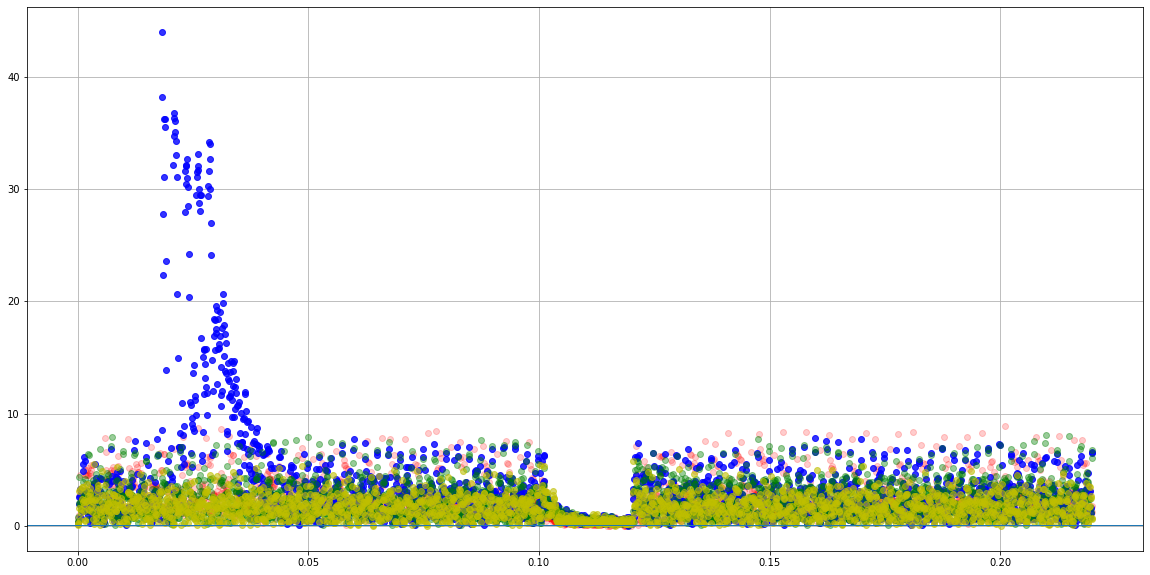

In [ ]:
#Shows time vs magnitude
t= np.arange(0,0.22,0.0001)                                                     #change 0.0001 to 0.00001 or 0.22 to 2.2 for 500Hz
figure(figsize=(20,10))
plot.plot(t,spike_train_1Hz_free['magnitude'],'ro',alpha = 0.2)
plot.plot(t,spike_train_2Hz_contact['magnitude'],'bo',alpha = 0.8)
plot.plot(t,spike_train_2Hz_free['magnitude'],'go',alpha = 0.4)
plot.plot(t,spike_train_3Hz_free['magnitude'],'yo',alpha = 0.6)
plot.grid(True)
plot.axhline(y=0.088,lw=1)
plot.show()

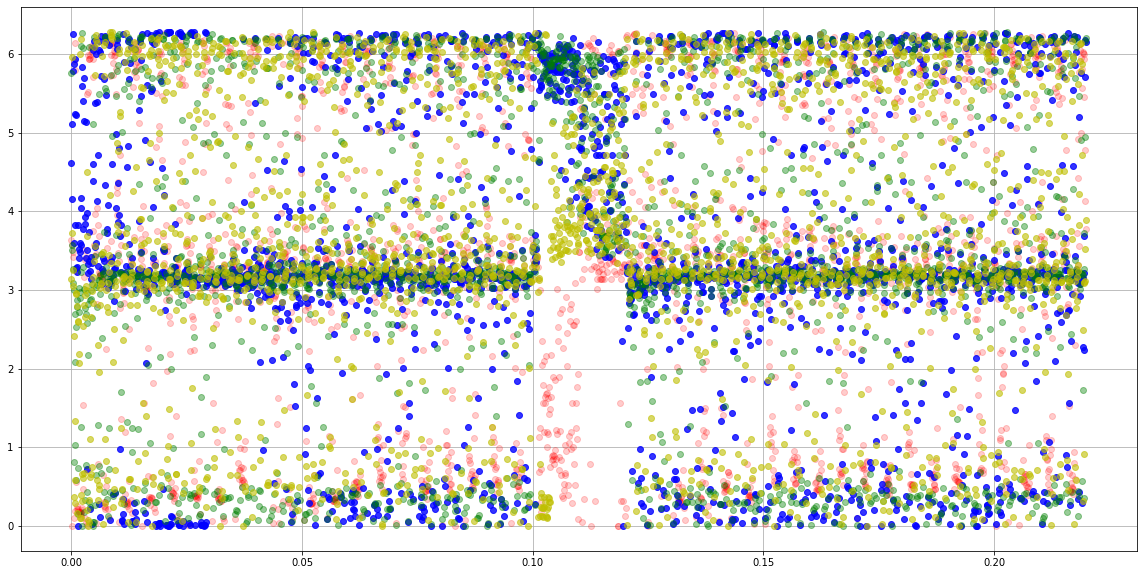

In [ ]:
#shows angle of deflection vs time

t= np.arange(0,0.22,0.0001)                                                     #change 0.0001 to 0.00001 or 0.22 to 2.2 for 500Hz
figure(figsize=(20,10))
plot.plot(t,spike_train_1Hz_free['theta'],'ro',alpha = 0.2)
plot.plot(t,spike_train_2Hz_contact['theta'],'bo',alpha = 0.8)
plot.plot(t,spike_train_2Hz_free['theta'],'go',alpha = 0.4)
plot.plot(t,spike_train_3Hz_free['theta'],'yo',alpha = 0.6)
plot.grid(True)
plot.show()

# Crucial functions

This section is used for making crucial functions for this model, it includes:



1.   poisson point process
2.   Gaussian function
3.   rastarplot
4.   Cell generator for both the networks
5.   Oscillator generator for both the networks



## Crucial for all

In [ ]:
# This function is used to simulate poisson point process

# INPUT:- fr:-> FIRING RATE || dt:-> clock speed || nbins:-> number of trials

def poisson_generator(fr,dt=1/1000,nbins=1):
  return np.clip(np.random.poisson(fr*dt,size=nbins),a_min=0,a_max=1)

In [ ]:
# this function will be used for raster plot generation
#here dt is something else and diti is the actual clock speed (Sorry for the confusion)
#The limitation on color might be the reason for some errors, mark the line with colour if this occured
# Do not forget to use plot.show() after this function
# just change dt to 1/10000 for 500Hz feature

#INPUT:- datan:-> input data in 1D or 2D array || diti:-> clock speed || l_limit,u_limit:-> lower and upper limit

def rastarplot(datan,diti=1/1000,l_limit=0,u_limit=0.5):
  #Only pass 2D array 
  #Don't pass array that has 1001 elements cause unknown error
  linelengths2 = np.ones(np.shape(datan)[0])*0.5                                # defines the x-axis for the raster plot 

  colors2 = ['C{}'.format(i) for i in range(np.shape(datan)[0])]                # various colours for different neurons 
  dt = np.arange(0,diti*np.size(datan[0]),diti)                                 # poisson process produces data in binaries, buth eventplot will display a spike if a number is provided (read documentation for matplotlib eventplot)
  x=datan*dt                                                                    # this function tries to do the same
  figure(figsize=(30, 8))
  plot.eventplot(x,linelengths=linelengths2,colors=colors2)                     # eventplot function
  plot.xlim((l_limit,u_limit))                                                  # upper and lower limit
  plot.grid(True)

In [ ]:
# This function is for Gausian Function

#INPUT:- x:-> input variable || amplitude:-> amplitude || constant:-> to set horizontal position || c:-> variable to chnage the width of the function || y:-> to change the position of function in vertical plane (never used in the code)

def gaussian_generator(x,amplitude=1, constant=2,c=2,y=0):
  return amplitude*np.exp(-1*(x-constant)**2/abs(c))+y

## Crucial functions for x-y deflection

In [ ]:
# This function is used for simulating the behaviour of neurons in deflection n/w
# Can be also used for simulating many iterations with same variable
# If this error messeage pops up: """The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()"""
# Then pass data as array 

#INPUT:- x:-> angle of deflection || cur_magnitude:-> magnitude of deflection || max_magnitude:-> how much whisker can bent || position_of_cell:-> position of gaussian fn on x-axis (in cartesian plane) 
#everything is calculated degrees here || tnbins:-> iteration of simulation || c,y,dt:-> used to set parameters for gaussian_generator || weights:-> if you want to set custom weights || noise limit:-> threshold value for magnitude

#OUTPUT:-> array having spike trains of input neurons ||| firing rates choice is yours.

def gaussian_cell_generator(x,cur_magnitude,max_magnitude=1,position_of_cells=[1,2,3],tnbins=1,c=2,y=0,weights = [1,1,1],noise_limit=0,dt=1/1000):

  if weights==[1,1,1]: weights = np.ones(np.size(position_of_cells)) 
  else: weights = weights

  if cur_magnitude<=noise_limit: cur_magnitude=0
  else: cur_magnitude = cur_magnitude
  
  amplitude = cur_magnitude/max_magnitude*1000

  firing_rate = np.zeros((np.size(position_of_cells),tnbins))
  cell = np.zeros((np.size(position_of_cells),tnbins))

  for i in range(np.size(position_of_cells)):
    cell[i] = poisson_generator(gaussian_generator(x,constant=position_of_cells[i],c=c,y=y,amplitude=amplitude*weights[i]),nbins=(1,tnbins),dt=dt)
    firing_rate[i] = gaussian_generator(x,constant=position_of_cells[i],c=c,y=y,amplitude=amplitude*weights[i])


  return cell, firing_rate

In [ ]:
# This function is to test the behaviour of deflection nw on angle of deflection Vs fr plot.
# No need to include plt.show()
# Shows the plot in radian

#INPUT:-> cur_magnitude,max_magnitude,position_of_cellsc,y,weights,noise_limit:-> same as gaussian_cell_generator() || x:-> location of black line (work as a pointer)
#l_limit,u_limit:-> starting and end of graph on X-axis || increments:-> to chose resolution

def gaussian_plot(cur_magnitude = 1,x=0,max_magnitude=1,position_of_cells=[1,2,3],l_limit=-2,u_limit=10,c=2,y=0,increments=0.1,weights = [1,1,1], noise_limit = 0):
  
  figure(figsize=(20,10))
  if weights==[1,1,1]: weights = np.ones(np.size(position_of_cells)) 
  else: weights = weights

  if cur_magnitude<=noise_limit: cur_magnitude=0
  else: cur_magnitude = cur_magnitude
  
  amplitude = cur_magnitude/max_magnitude*1000

  t = np.arange(l_limit,u_limit,increments)
  for i in range(np.size(position_of_cells)):
    plot.plot(t, gaussian_generator(t,amplitude=amplitude*weights[i],constant=position_of_cells[i],c=c,y=y))
    plot.grid(True)
    plot.xticks()
  plot.axvline(x=x,color="grey",lw=2)
  plot.axvline(x=0,color="black")
  plot.axhline(y=0,color="black")
  plot.show()

In [ ]:
# This function simulates sensory data coming from whisk-eye robot to the cells. could have used direct array multiplication
# However, for simulating as much as real possible FOR loop was used

#INPUT:-> osc_data:-> deflection angle from the dataset || cur_magnitude:-> magnitude of deflection from dataset || position_of_cell,c,y,max_magnitude,noise_limit,weights,dt:-> to set parameters of gaussian_cell_generator()

#OUTPUT:-> spike trains for neurons ||| firing rate

def poisson_osc_gaussian(osc_data,cur_magnitude,position_of_cells=[1,2,3],c=2,y=0,max_magnitude=1,noise_limit=0,weights = [1,1,1],dt = 1/1000):

  size_counter = -1
  x = np.zeros((np.size(position_of_cells),np.shape(osc_data)[0]))
  fr = np.zeros((np.size(position_of_cells),np.shape(osc_data)[0]))
  for i in osc_data:
    size_counter += 1
    x[:,size_counter] = gaussian_cell_generator(x = i,cur_magnitude=cur_magnitude[size_counter],
                                                tnbins=1,position_of_cells=position_of_cells,c=c,
                                                y=y,max_magnitude=max_magnitude,
                                                noise_limit=noise_limit,
                                                weights = weights,dt = dt)[0][:,0]
    fr[:,size_counter] = gaussian_cell_generator(x = i,cur_magnitude=cur_magnitude[size_counter],
                                                tnbins=1,position_of_cells=position_of_cells,c=c,
                                                y=y,max_magnitude=max_magnitude,
                                                noise_limit=noise_limit,
                                                weights = weights)[1][:,0]
  return x,fr

## crucial functions for osc

Most of the functions in this n/w is same as deflection n/w but has less variables

In [ ]:
# generates neurons used in oscillation n/w
#similar to gaussian_cell_generator() but only for other network and with less variables

#INPUT:-> ALL THE VARIABLES IN THIS FUNCTION SERVES THE SAME PURPOSE AS IN gaussian_cell_generator()

#OUTPUT:-> SAME OUTPUT AS gaussian_cell_generator()

def gaussian_cell_generator_osc(x,amplitude=1000,position_of_cells=[1,2,3],tnbins=1,c=2,y=0,dt = 1/1000):

  cell = np.zeros((np.size(position_of_cells),tnbins))
  for i in range(np.size(position_of_cells)):
    cell[i] = poisson_generator(gaussian_generator(x,constant=position_of_cells[i],c=c,y=y,amplitude=amplitude),nbins=(1,tnbins),dt = dt)
  return cell

In [ ]:
# this function is to visualise neuron population behaviour of oscillation n/w on angle of whisking Vs firing rate plot

#INPUT:-> degree:-> shows the plot in degree || ALL THE VARIABLE SAME AS gaussian_plot()
def gaussian_plot_osc(x=0,amplitude=1000,position_of_cells=np.deg2rad(np.arange(-60,60,1)),l_limit=-2,u_limit=10,c=2,y=0,increments=0.1,degree = False):
  
  t=0
  #figure(figsize=(20,10))
  if degree == True: t = np.deg2rad(np.arange(l_limit,u_limit,increments))
  else: t = np.deg2rad(np.arange(l_limit,u_limit,increments))
  for i in range(np.size(position_of_cells)):
    plot.plot(t, gaussian_generator(t,amplitude=amplitude,constant=position_of_cells[i],c=c,y=y))
    plot.grid(True)
    plot.xticks()
  plot.axvline(x=x,color="grey",lw=2)
  plot.axvline(x=0,color="black")
  plot.axhline(y=0,color="black")
  plot.show()

In [ ]:
# this function simulates sensory output coming from whisk-eye robot's whiskers.
# to increase the number of neurons in this network just change 1 in position_of_cells=np.deg2rad(np.arange(-60,60,1)) to whatever you want
# INPUTS & OUTPUTS:- SAME AS poisson_osc_gaussian()
def poisson_osc_gaussian_osc(osc_data,position_of_cells=np.deg2rad(np.arange(-60,60,1)),amplitude=1000,c=2,y=0,dt = 1/1000):

  size_counter = -1
  x = np.zeros((np.size(position_of_cells),np.shape(osc_data)[0]))
  for i in osc_data:
    size_counter += 1
    x[:,size_counter] = gaussian_cell_generator_osc(x = i,tnbins=1,position_of_cells=position_of_cells,amplitude=amplitude,c=c,y=y,dt = dt)[:,0]
  return x

# X-Y deflection network

Do not rin this cell if you want to see the Point Based Cloud (PBC). Run this only if you want to see the rastar plots for individual whiskers 

## Testing with single inputs from dataset

In [ ]:
gaussian_plot(cur_magnitude = spike_train_2Hz_contact['magnitude'][355],
              x = np.deg2rad(67),position_of_cells=np.deg2rad(np.arange(45,360,45)),l_limit=-1,u_limit=7.8,c=0.2,
              increments=0.01,
              max_magnitude=spike_train_2Hz_contact['magnitude'].max(),
              noise_limit = 0.088)
plot.show()

In [ ]:
np.rad2deg(spike_train_2Hz_contact['magnitude'][355])

576.1180185594145

In [ ]:
rastarplot(gaussian_cell_generator(cur_magnitude = spike_train_2Hz_contact['magnitude'][355],
              x = np.deg2rad(180),position_of_cells=np.deg2rad(np.arange(45,360,45)),c=0.2,
              max_magnitude=spike_train_2Hz_contact['magnitude'].max(),
              noise_limit = 0.088,
              tnbins=2200)[0],u_limit = 2.2)
plot.show()

In [ ]:
rastarplot(gaussian_cell_generator(cur_magnitude = spike_train_2Hz_contact['magnitude'][355],
              x = np.deg2rad(180),position_of_cells=np.deg2rad(np.arange(45,360,45)),c=0.2,
              max_magnitude=spike_train_2Hz_contact['magnitude'].max(),
              noise_limit = 0.088,
              tnbins=500)[0],u_limit = 0.5)
plot.show()

## spike trains for x-y deflection network

### 2Hz free

In [ ]:
xy_network_2Hz_free = poisson_osc_gaussian(spike_train_2Hz_free['theta'][0:2200],cur_magnitude=spike_train_2Hz_free['magnitude'][0:2200],
                                                 position_of_cells=np.deg2rad(np.arange(45,360,45)),c=0.2,
                                                 max_magnitude=spike_train_2Hz_free['magnitude'].max(),
                                                 noise_limit=8.8)
rastarplot(xy_network_2Hz_free[0],u_limit=2.2)
plot.show()

### 2Hz contact

In [ ]:
xy_network_2Hz_contact = poisson_osc_gaussian(spike_train_2Hz_contact['theta'],cur_magnitude=spike_train_2Hz_contact['magnitude'],
                                                 position_of_cells=np.deg2rad(np.arange(45,360,45)),c=0.2,
                                                 max_magnitude=spike_train_2Hz_contact['magnitude'].max(),
                                                 noise_limit=8.8)
rastarplot(xy_network_2Hz_contact[0],u_limit=2.2)
plot.show()


# Oscillation network

Do not rin this cell if you want to see the Point Based Cloud (PBC). Run this only if you want to see the rastar plots for individual whiskers 

## Testing cells with single input

In [ ]:
figure(figsize=(20,10))
gaussian_plot_osc(x=np.deg2rad(-50) ,position_of_cells=np.deg2rad(np.arange(-60,60,1)),l_limit=-90,u_limit=90,c=0.03,increments=0.001,amplitude=900)

In [ ]:
osc_network_1Hz_free = poisson_osc_gaussian_osc(spike_train_1Hz_free['theta_meas_50Hz'],position_of_cells=np.deg2rad(np.arange(-60,60,1)),c=0.03,amplitude=900)
rastarplot(osc_network_1Hz_free,l_limit=0,u_limit=2.2)
plot.show()

In [ ]:
rastarplot(gaussian_cell_generator_osc(x=np.deg2rad(10),c=0.03,amplitude=1000,tnbins=500),u_limit=0.5)
plot.show()

## Spikes for different 50Hz_Meas

### 1Hz free

In [ ]:
osc_network_1Hz_free = poisson_osc_gaussian_osc(spike_train_1Hz_free['theta_meas_50Hz'],c=0.03,amplitude=900)
rastarplot(osc_network_1Hz_free,l_limit=0,u_limit=2.2)
plot.show()

### 2Hz contact

In [ ]:
osc_network_2Hz_contact = poisson_osc_gaussian_osc(spike_train_2Hz_contact['theta_meas_50Hz'],c=0.03,amplitude=1000)
rastarplot(osc_network_2Hz_contact,l_limit=0.25,u_limit=2.2)
plot.show()

### 2Hz free

In [ ]:
osc_network_2Hz_free = poisson_osc_gaussian_osc(spike_train_2Hz_free['theta_meas_50Hz'],c=0.03,amplitude=900)
rastarplot(osc_network_2Hz_free,l_limit=0,u_limit=2.2)
plot.show()

### 3Hz free

In [ ]:
osc_network_3Hz_free = poisson_osc_gaussian_osc(spike_train_3Hz_free['theta_meas_50Hz'],c=0.03,amplitude=900)
rastarplot(osc_network_3Hz_free,l_limit=0,u_limit=2.2)
plot.show()

# coincident detector

This section is used for:



1.   Visualising
2.   puting the code in deflection and oscillation n/w.

For 24 Whiskers



## Data visualisation for 24 whiskers

If you want to se result DO NOT RUN THIS CODE

In [ ]:
# Visualise theta meas for 24 whiskers

t = np.arange(0.0, 2.20, 0.001)

for i in range(24):
  print(i)
  figure(figsize=(30,8))
  plot.plot(t, np.rad2deg(spike_train_var[i]['theta_meas_50Hz']))
  plot.grid(True)
  plot.show()

In [ ]:
# polar plot for angle_of_deflection & magnitude
# Chose i for whisker you want to visualise 0:-> 100mm || 1:-> 150 || 3:-> 220 || 4:-> 300
figure(figsize=(10,10))
i = 0
plot.polar(np.rad2deg(spike_train_var[i]['theta']),spike_train_var[i]['magnitude'],'bo',alpha = 0.3)
plot.polar(np.rad2deg(spike_train_var[i+4]['theta']),spike_train_var[i+4]['magnitude'],'go',alpha = 0.3)
plot.polar(np.rad2deg(spike_train_var[i+8]['theta']),spike_train_var[i+8]['magnitude'],'ro',alpha = 0.3)
plot.polar(np.rad2deg(spike_train_var[i+12]['theta']),spike_train_var[i+12]['magnitude'],'co',alpha = 0.3)
plot.polar(np.rad2deg(spike_train_var[i+16]['theta']),spike_train_var[i+16]['magnitude'],'mo',alpha = 0.3)
plot.polar(np.rad2deg(spike_train_var[i+20]['theta']),spike_train_var[i+20]['magnitude'],'yo',alpha = 0.3)
plot.ylim(0,100)
plot.show()

## Spike trains after processing through oscillation and deflection n/w

In [ ]:
#Passing data from 24 whiskers to deflection n/w output result is concatenated to in one neuron per whisker.
#to increase the number of cells in this n/w just change 45 in """position_of_cells=np.deg2rad(np.arange(45,360,45))""" to watever you want
xy_network_var = []
for i in range(6):
  xy_network_var.append(poisson_osc_gaussian(spike_train_var[0+4*i]['theta'],cur_magnitude=spike_train_var[0+4*i]['magnitude'],
                                                 position_of_cells=np.deg2rad(np.arange(45,360,45)),c=0.2,
                                                 max_magnitude=spike_train_var[0+4*i]['magnitude'].max(),
                                                 noise_limit=8.8)[0])
  
  xy_network_var.append(poisson_osc_gaussian(spike_train_var[1+4*i]['theta'],cur_magnitude=spike_train_var[1+4*i]['magnitude'],
                                                 position_of_cells=np.deg2rad(np.arange(45,360,45)),c=0.2,
                                                 max_magnitude=spike_train_var[0+4*i]['magnitude'].max(),
                                                 noise_limit=12)[0])
  
  xy_network_var.append(poisson_osc_gaussian(spike_train_var[2+4*i]['theta'],cur_magnitude=spike_train_var[2+4*i]['magnitude'],
                                                 position_of_cells=np.deg2rad(np.arange(45,360,45)),c=0.2,
                                                 max_magnitude=spike_train_var[0+4*i]['magnitude'].max(),
                                                 noise_limit=20)[0])
  
  xy_network_var.append(poisson_osc_gaussian(spike_train_var[3+4*i]['theta'],cur_magnitude=spike_train_var[3+4*i]['magnitude'],
                                                 position_of_cells=np.deg2rad(np.arange(45,360,45)),c=0.2,
                                                 max_magnitude=spike_train_var[0+4*i]['magnitude'].max(),
                                                 noise_limit=28)[0])

or_logic_var = []
for i in range(24):
  or_logic_var.append(np.array([xy_network_var[i][0]+xy_network_var[i][1]+xy_network_var[i][2]+xy_network_var[i][3]+xy_network_var[i][4]+xy_network_var[i][5]+xy_network_var[i][6]]))
or_logic_var = np.clip(or_logic_var,a_min=0,a_max=1)                            # Output is saved here

In [ ]:
# passing data from 24 whiskers to oscillation n/w 
osc_network_var = []
for i in range(24):
  osc_network_var.append(poisson_osc_gaussian_osc(spike_train_var[i]['theta_meas_50Hz'],c=0.03,amplitude=1000))   # Output saved here

In [ ]:
# The final coincident detector
and_logic_var = []

for i in range(24):
  and_logic_var.append(or_logic_var[i]*osc_network_var[i])
and_logic_var = np.clip(and_logic_var,a_min=0,a_max=1)                          #output saved here

## Plot for X-Y deflection of 24 whiskers

In [ ]:
for i in range(24):
  rastarplot(xy_network_var[i],u_limit=2.2)
  plot.title('whisker'+str(i+1))
  plot.ylabel('neurons')
  plot.xlabel('time(s)')
  #plot.savefig('/content/gdrive/MyDrive/project_folder/50_deflection_'+str(i+1))   #Comment out to save figure (don't forget to mention the location)
plot.show()                                                                        

## Oscillation for 24 Whiskers

In [ ]:
for i in range(24):
  rastarplot(osc_network_var[i],u_limit=2.2)
  plot.title('whisker'+str(i+1))
  plot.ylabel('neurons')
  plot.xlabel('time(s)')
  #plot.savefig('/content/gdrive/MyDrive/project_folder/50_oscillation'+str(i+1)) # Comment out to save figure
plot.show()

## Coincident detction for 24 whiskers

In [ ]:
for i in range(24):
  rastarplot(and_logic_var[i],u_limit=2.2)
  plot.title('whisker'+str(i+1))
  plot.ylabel('neurons')
  plot.xlabel('time(s)')
  #plot.savefig('/content/gdrive/MyDrive/project_folder/50_coincident_'+str(i+1))   # comment out to save figure
plot.show()

# Point Based Cloud

## point-set

In [ ]:
#This function is used to make point_set variable which has information of x,y,z coordinate of each neurons

#INPUT:- w_length:-> whisker_length || w_offset:-> 3degrees for each whisker except for 300mm

#OUTPUT:->  array having information about x,y,z coordinated of 120 neurons for 24 whiskers

def point_maker(w_length,w_offset,):
  
  y = 180-w_offset                                                                                              # y represents the angle by which the plane of whisker should be rotated
  # defining the circle in below line                              
  y_1 = w_length*np.sin(np.deg2rad(np.arange(145,265,1)))-50*np.sin(np.deg2rad(w_offset))                       # defining the circle which subtends angle of 120 degree 
  x_1 = w_length*np.cos(np.deg2rad(np.arange(145,265,1)))-50*np.cos(np.deg2rad(w_offset))                       # Also shifing the origin of circle to end of circle
  z_1 = np.zeros(np.size(x_1))
 

  # can rotate the plane using this technique
  rotated_vec_1 = R.from_rotvec(np.radians(y)*np.array([0,1,0])).apply(np.column_stack((x_1,y_1,z_1)))         # Rotating the plane of whisker
  return rotated_vec_1 

In [ ]:
# Point set variable is made here
# Below array defines the angles of arrays (referenced from mail given by Tom Knowles)
w_offset = [-25,15,65,115,165,205]

# Making a array known as point_sets which has information about position of each neuron in physical plain
point_sets = []

for i in w_offset:
  point_sets.append(point_maker(100,i-3))
  point_sets.append(point_maker(150,i-3))
  point_sets.append(point_maker(220,i-3))
  point_sets.append(point_maker(300,i))
point_sets = np.array(point_sets)

for i in range(6):
  point_sets[4*i+1][:,1] = point_sets[4*i+1][:,1]+20                      # All the whiskers > 100mm are placed at 20mm distance from previous one and 
  point_sets[4*i+1][:,2] = point_sets[4*i+1][:,2]+20                      # array forms an angle of 45 degree hence 20mm is incremented in bothx and z axis because 
  point_sets[4*i+2][:,1] = point_sets[4*i+2][:,1]+40                      # array is purtuating (outward facing)
  point_sets[4*i+2][:,2] = point_sets[4*i+2][:,2]+40                                                    
  point_sets[4*i+3][:,1] = point_sets[4*i+3][:,1]+60
  point_sets[4*i+3][:,2] = point_sets[4*i+3][:,2]+60

# This defines the origin circle which resembles the nose of whisk-eye robot
r_s = 50                                   
y_s = r_s*np.sin(np.deg2rad(np.arange(0,360,np.rad2deg(1)/r_s)))
x_s = r_s*np.cos(np.deg2rad(np.arange(0,360,np.rad2deg(1)/r_s)))
z_s = np.zeros(np.size(x_s))

original_circle = np.column_stack((x_s,y_s,z_s)) 

In [ ]:
# Make scatter plot to display point set from different azimuth and elevations

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')


ax.scatter3D(original_circle[:,2],original_circle[:,0],original_circle[:,1])      # Origin Circle                                           

for i in range(24):
  ax.scatter3D(point_sets[i][:,1],point_sets[i][:,0],point_sets[i][:,2])          # Scatter plot of all the points

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-label')

ax.set_xlim(-300,300)
ax.set_ylim(-300,300)
ax.set_zlim(-100,300)
plot.show()

def animate(i):
  ax.view_init(azim=i)
  return fig,

anim = animation.FuncAnimation(fig, animate,
                               frames=np.arange(0,360,10), interval=40, blit=True)

def animate2(i):
  ax.view_init(i,0)
  return fig,

anim2 = animation.FuncAnimation(fig, animate2,
                               frames=np.arange(0,100,1), interval=40, blit=True)


In [ ]:
anim

In [ ]:
HTML(anim.to_html5_video())                 #Do not Run this code if you don't want to save the animation
                                            #This is to make a video of the simulation to export it outsid since the last is incapable of doing so

In [ ]:
anim2

In [ ]:
HTML(anim2.to_html5_video())                                  #Do not Run this code if you don't want to save the animation
                                                             #This is to make a video of the simulation to export it outsid since the last is incapable of doing so

## Point cloud

In [ ]:
#make a variable to store all values of point cloud animation

point_cloud = np.zeros((2200,24,120,3))                                         
for k in range(2200):
  for i in range(24):
    for j in range(120):
      point_cloud[k,i,j] = and_logic_var[i,j,k]*point_sets[i,j]

In [ ]:
# Set parameters for point cloud animation

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')


# animating the sactter plot
def animate(k):
  ax.clear()                                                                        # just comment this line to get impresssion of the object

  ax.scatter3D(original_circle[:,2],original_circle[:,0],original_circle[:,1])      # Origin Circle   

  ax.set_xlabel('x-axis')
  ax.set_ylabel('y-axis')
  ax.set_zlabel('z-label')
  ax.set_xlim(-300,300)                                                             # Change this values for magnification
  ax.set_ylim(-300,300)
  ax.set_zlim(-100,300) 
  #ax.view_init(60,180)                                                             # Comment for changing the azimuth and elevation and change those values as desired   

  for i in range(24):
    ax.scatter3D(point_cloud[k][i][:,1],point_cloud[k][i][:,0],point_cloud[k][i][:,2])
  

anim_pc = animation.FuncAnimation(fig, animate,
                               frames=np.arange(0,2200,5), interval=1, blit=False)

In [ ]:
#Compile point cloud animation
anim_pc     

In [ ]:
#Do not run this code if you don't wish to save this animation
HTML(anim_pc.to_html5_video())

# References



1.   [Simulating-Neural_spike-train](https://praneethnamburi.com/2015/02/05/simulating-neural-spike-trains/)
2.   [random-timing-for-poisson-process](https://preshing.com/20111007/how-to-generate-random-timings-for-a-poisson-process/)
3.   Matplotlib
4.   Numpy
5.   Pandas

